# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nizma Dhafin Helmy
- **Email:** nizmadhafin@gmail.com
- **ID Dicoding:** nizma_dhafin_helmy

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda dari tahun 2011 sampai tahun 2012?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda berdasarkan pelanggan terdaftar dan kasual?
- Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur?
- Berapa perbandingan antara pelanggan terdaftar dan kasual?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

Pada tahap ini, kita akan mengumpulkan data yang telah kita kumpulkan dan mengimpor file dataset **day.csv** dan **hr.csv**

In [2]:
# Memuat tabel jumlah penyewa sepeda yang diagregasi setiap hari
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel jumlah penyewa sepeda yang diagregasi setiap jam
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Selanjutnya, kita akan memeriksa tipe data dari tiap kolom yang terdapat dalam day_df dan hour_df.

In [4]:
# Memeriksa tipe data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Memeriksa tipe data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari day_df dan hour_df, dapat kita lihat bahwa terdapat satu tipe data yang tidak sesuai dan perlu diperbaiki, yaitu kolom dteday, yang seharusnya memiliki tipe data datetime.

Selanjutnya, kita akan memeriksa keberadaan missing values dari dataset day_df dan hour_df.

In [6]:
# Memeriksa keberadaan missing value dari dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Memeriksa keberadaan missing value dari dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat kita lihat bahwa dataset day_df dan hour_df tidak ada missing value.

Selanjutnya, kita akan memeriksa apakah terdapat data yang terduplikat pada dataset day_df dan hour_df.

In [8]:
# Memeriksa duplikasi data pada tabel day_df dan hour_df
print("Jumlah duplikasi pada data day_df: ", day_df.duplicated().sum())
print("Jumlah duplikasi pada data hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi pada data day_df:  0
Jumlah duplikasi pada data hour_df:  0


Pada tabel day_df maupun hour_df terdapat 0 data yang terduplikasi. Artinya, semua data pada tabel day_df dan hour_df bersifat unik.

Tahap selanjutnya, kita akan memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df dan hour_df.

In [9]:
# Memeriksa parameter statistik dari kolom numerik untuk tabel day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
# Memeriksa parameter statistik dari kolom numerik untuk tabel hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Pada tahapan Assessing Data diperoleh insight sebagai berikut:
- Terdapat ketidaksesuaian tipe data pada kolom dteday yang seharusnya memiliki tipe data datetime.
- Tidak terdapat missing value pada dataframe day_df maupun hour_df.
- Semua data pada dataframe day_df dan hour_df bersifat unik, artinya tidak ada data yang terduplikat.
- Semua data pada dataframe day_df dan hour_df sudah memiliki parameter statistik yang sesuai.

### Cleaning Data

In [11]:
# Menghapus kolom yang tidak terpakai
day_df.drop(['instant'], axis = 1, inplace = True)

In [12]:
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
# Mengubah tipe data dteday yang tadinya 'object' menjadi 'datetime'
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [15]:
# Mengubah tipe data 'int' menjadi 'category' pada kolom 'season', 'mnth', 'holiday', 'weekday','workingday', dan 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in columns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

In [16]:
# Mengganti nama kolom agar mudah dibaca untuk dataframe day_df
day_df.rename(columns = {'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'count'}, inplace = True)

In [17]:
# Mengganti nama kolom agar mudah dibaca untuk dataframe hour_df
hour_df.rename(columns = {'dteday': 'dateday', 'yr': 'year', 'mnth': 'month', 'hr': 'hours', 'weathersit': 'weather_situation', 'hum': 'humidity', 'cnt': 'count'}, inplace = True)

In [18]:
# Mengkonversi isi kolom agar mudah dipahami
# Konversi kolom 'season' menjadi: 1:Spring, 2: Summer, 3:Fall, 4:Winter
day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: ' Winter'})
hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: ' Winter'})

# Konversi kolom 'month' menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df['month'] = day_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
hour_df['month'] = hour_df['month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Konversi kolom 'weather_situation' menjadi: 1: Clear/Partly Cloudy, 2: Mist/Cloudy, 3:Light Snow/Rain, 4: Heavy Rain/Snow
day_df['weather_situation'] = day_df['weather_situation'].replace({1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})
hour_df['weather_situation'] = hour_df['weather_situation'].replace({1: 'Clear/Partly Cloudy', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'})

# Konversi kolom 'weekday' menjadi: 0: Sun, 1: Mon, 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat
day_df['weekday'] = day_df['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})
hour_df['weekday'] = hour_df['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Konversi kolom 'year' menjadi: 0: 2011, 1: 2012
day_df['year'] = day_df['year'].replace({0: '2011', 1: '2012'})
hour_df['year'] = hour_df['year'].replace({0: '2011', 1: '2012'})


C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\890055577.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['season'] = day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: ' Winter'})
C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\890055577.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: ' Winter'})
C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\890055577.py:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with Categoric

**Insight:**

Pada tahapan Cleaning Data, kita telah melakukan beberapa hal sebagai berikut:
- Menghapus kolom yang tidak terpakai, yaitu kolom 'instant' pada dataframe day_df karena sudah terwakilkan pada dataframe hour_df.
- Mengubah tipe data dteday yang awalnya bertipe 'object' menjadi 'datetime'.
- Mengubah tipe data 'int' menjadi 'category' untuk kolom 'season', 'mnth', 'holiday', 'weekday', 'workingday',dan 'weathersit' karena kolom-kolom tersebut berupa kumpulan informasi yang membentuk suatu karakteristik.
- Mengganti nama kolom 'dteday', 'yr', 'hr', 'mnth', 'weathersit', 'hum', dan 'cnt' menjadi kolom dengan nama 'datetime', 'year', 'hours', 'month', 'weather_situation', 'humidity', dan 'count' agar lebih mudah dibaca.
- Mengkonversi isi kolom 'season', 'month', 'weather_situation', 'weekday', dan 'year' agar lebih mudah dipahami.

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [19]:
# Melihat parameter statistik deskriptif dari dataframe hour_df
hour_df.describe(include="all")

,instant,dateday,season,year,month,hours,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Berdasarkan output statistik deskriptif untuk dataframe hour_df, dapat dilihat bahwa dataset berisi 17379 entri dengan data yang dimulai dari tanggal 1 Januari 2011 hingga 31 Desember 2012. Musim gugur (Fall) memiliki jumlah entri terbanyak, yaitu 4496. Sedangkan, bulan dengan frekuensi penyewaan sepeda per jam tertinggi adalah bulan Juli dengan 1488 entri. Rata-rata jumlah penyewaan sepeda per jam adalah 189,46 dengan rata-rata jumlah pengguna terdaftar sebesar 153,78 dan rata-rata jumlah pengguna kasual sebesar 35,67. Jumlah penyewaan sepeda minimum dalam satu jam adalah 1 sepeda, sedangkan jumlah penyewaan sepeda maksimum dalam satu jam adalah 977 sepeda. Dari rentang waktu pukul 00.00 sampai 23.00, rata-rata penyewaan sepeda terjadi pada pukul 11.54.

In [20]:
# Jumlah penyewaan sepeda berdasarkan jam
hour_df.groupby(by = 'hours').agg({
    'count': ['sum']
})

,count
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan output tersebut, dapat diketahui bahwa penyewaan sepeda paling banyak terjadi pukul 17.00, sedangkan penyewaan sepeda yang paling sedikit terjadi pada pukul 04.00

### Explore Data day_df

In [21]:
# Melihat parameter statistik deskriptif dari dataframe day_df
day_df.describe(include="all")

,dateday,season,year,month,holiday,weekday,workingday,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731,731,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,2012,Jan,0.0,Sun,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Berdasarkan output statistik deskriptif untuk dataframe day_df, dapat dilihat bahwa dataset berisi 731 entri dengan data yang dimulai dari tanggal 1 Januari 2011 hingga 31 Desember 2012. Musim gugur (Fall) memiliki jumlah entri terbanyak, yaitu 188. Sedangkan, bulan dengan frekuensi harian tertinggi adalah bulan Januari dengan 62 entri. Rata-rata jumlah penyewaan sepeda per hari adalah 4504,34 dengan rata-rata jumlah pengguna terdaftar sebesar 3656,17 dan rata-rata jumlah pengguna kasual sebesar 848,17. Jumlah penyewaan sepeda minimum dalam satu hari adalah 22 sepeda, sedangkan jumlah penyewaan sepeda maksimum dalam satu hari adalah 8714 sepeda.

In [22]:
# Penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan bulan
day_df.groupby(by = 'month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\188479394.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'month').agg({


count                           
        max   min         mean     sum
month                                 
Jan    4521   431  2176.338710  134933
Feb    5062  1005  2655.298246  151352
Mar    8362   605  3692.258065  228920
Apr    7460   795  4484.900000  269094
May    8294  2633  5349.774194  331686
Jun    8120  3767  5772.366667  346342
Jul    8173  3285  5563.677419  344948
Aug    7865  1115  5664.419355  351194
Sep    8714  1842  5766.516667  345991
Oct    8156    22  5199.225806  322352
Nov    6852  1495  4247.183333  254831
Dec    6606   441  3403.806452  211036

Tabel penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan bulan untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh bahwa rata-rata penyewaan sepeda tertinggi terjadi pada bulan Juni, yaitu 5772,36. Sedangkan, rata-rata penyewaan sepeda terendah terjadi pada bulan Januari, yaitu 2176,33. Jumlah penyewaan sepeda terbanyak terjadi pada bulan Agustus, sedangkan jumlah penyewaan sepeda terendah terjadi pada bulan Januari.

In [23]:
# Penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan keadaan cuaca
day_df.groupby(by = 'weather_situation').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\4191880428.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'weather_situation').agg({


count                           
                      max  min         mean      sum
weather_situation                                   
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Mist/Cloudy          8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

Tabel penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan keadaan cuaca untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh bahwa pelanggan cenderung menyewa sepeda pada saat cuaca cerah atau sebagian berawan. Pelanggan cenderung tidak menyewa sepeda pada saat cuaca hujan atau bersalju ringan.

In [24]:
# Penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan hari libur
day_df.groupby(by = 'holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\4178591180.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'holiday').agg({


count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Tabel penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan keadaan hari libur untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh bahwa pelanggan cenderung menyewa sepeda pada hari biasa dibandingkan pada hari libur.

In [25]:
# Perbandingan penyewaan sepeda pada saat hari kerja dan akhir pekan
day_df.groupby(by = 'weekday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\2037381234.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'weekday').agg({


count                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

Tabel perbandingan penyewaan sepeda berdasarkan hari kerja dan akhir pekan untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh bahwa rata-rata penyewaan sepeda tertinggi terjadi pada hari Jumat, kemudian dilanjutkan dengan hari Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.

In [26]:
# Penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan hari kerja
day_df.groupby(by = 'workingday').agg({
    'count': ['max', 'min', 'mean']
})

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\4039704322.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'workingday').agg({


count                  
             max  min         mean
workingday                        
0           8714  605  4330.168831
1           8362   22  4584.820000

Tabel penyewaan sepeda berdasarkan hari kerja untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh bahwa rata-rata jumlah penyewaan sepeda pada hari kerja lebih tinggi dibandingkan dengan bukan hari kerja.

In [27]:
# Penyewaan sepeda (baik pelanggan terdaftar maupun kasual) berdasarkan musim
day_df.groupby(by = 'season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean']
})

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\4143301364.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'season').agg({


casual   registered count                   
                mean         mean   max   min         mean
season                                                    
Spring    334.928177  2269.204420  7836   431  2604.132597
Summer   1106.097826  3886.233696  8362   795  4992.331522
Fall     1202.611702  4441.691489  8714  1115  5644.303191
 Winter   729.112360  3999.050562  8555    22  4728.162921

Tabel perbandingan penyewaan sepeda berdasarkan musim untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh bahwa pelanggan terdaftar dan pelanggan kasual cenderung untuk menyewa sepeda pada musim gugur (fall). Sedangkan, pelanggan terdaftar dan pelanggan kasual lebih jarang menyewa sepeda pada musim semi (spring).

In [28]:
# Penyewaan sepeda tiap tahun berdasarkan kriteria pelanggan
day_df.groupby(by = 'year').agg({
    'registered': 'sum',
    'casual': 'sum'
})

,registered,casual
year,,
2011,995851,247252
2012,1676811,372765


Tabel penyewaan sepeda tiap tahun berdasarkan kriteria pelanggan untuk periode 1 Januari 2011 hingga 31 Desember 2012. Berdasarkan output tersebut diperoleh beberapa hal sebagai berikut:
- Jumlah pelanggan terdaftar dan pelanggan kasual tahun 2011 dan 2012 memiliki perbedaan yang signifikan.
- Jumlah pelanggan (baik pelanggan terdaftar maupun kasual) bertambah selama dua tahun terakhir.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana tren penyewaan sepeda dari tahun 2011 sampai tahun 2012?

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\2758292831.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by = ['month', 'year']).agg({


<function matplotlib.pyplot.show(close=None, block=None)>

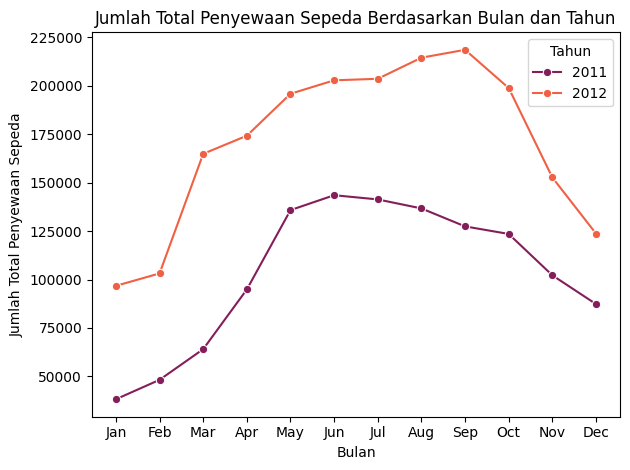

In [29]:
# Mengatur urutan kategori pada kolom 'month'
day_df['month'] = pd.Categorical(day_df['month'],
                                 categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                                 ordered=True)

# Mengelompokkan penyewaan sepeda berdasarkan bulan dalam setahun
monthly_counts = day_df.groupby(by = ['month', 'year']).agg({
    'count': 'sum'
}).reset_index()

# Membuat line plot untuk jumlah penyewaan tiap bulan dalam setahun
sns.lineplot(data=monthly_counts,
             x='month',
             y='count',
             hue='year',
             palette='rocket',
             marker='o')

# Membuat judul
plt.title('Jumlah Total Penyewaan Sepeda Berdasarkan Bulan dan Tahun')

# Penamaan untuk sb x
plt.xlabel('Bulan')

# Penamaan untuk sb y
plt.ylabel('Jumlah Total Penyewaan Sepeda')

# Penamaan legend
plt.legend(title='Tahun', loc='upper right')

plt.tight_layout()
plt.show

Berdasarkan visualisasi menggunakan *lineplot* diperoleh bahwa terjadi peningkatan jumlah total penyewaan sepeda dari tahun 2011 ke tahun 2012 di setiap bulannya. Jumlah total penyewaan sepeda tertinggi pada tahun 2012 terjadi pada bulan September, sedangkan jumlah total penyewaan sepeda tertinggi pada tahun 2011 terjadi pada bulan Juni. Sementara itu, jumlah total penyewaan sepeda terendah terjadi pada bulan Januari untuk tahun 2012 dan 2011.

### Pertanyaan 2:
Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda berdasarkan pelanggan terdaftar dan kasual?

C:\Users\nizma\AppData\Local\Temp\ipykernel_13748\2587507625.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_users = day_df.groupby(by = 'season').agg({


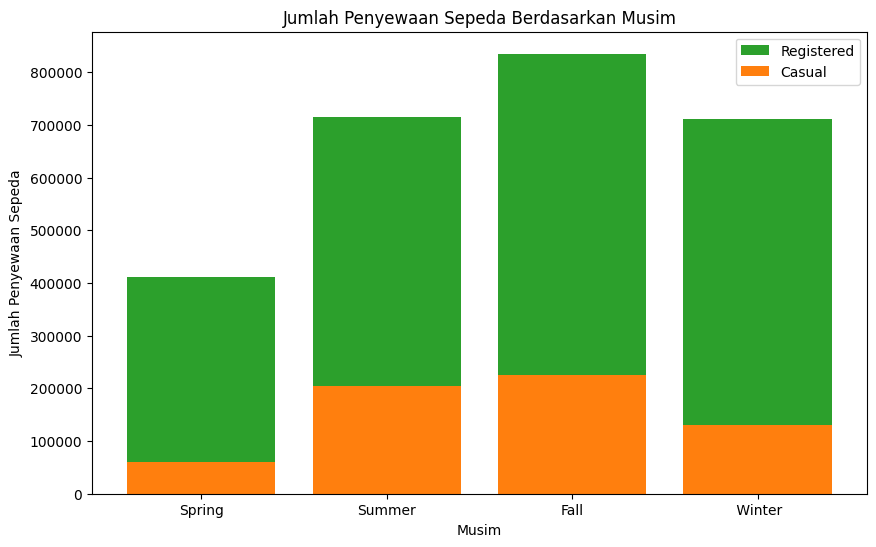

In [30]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah pelanggan terdaftar dan kasual
seasonal_users = day_df.groupby(by = 'season').agg({
    'registered': 'sum',
    'casual': 'sum'
}).reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))

plt.bar(seasonal_users['season'],
        seasonal_users['registered'],
        label='Registered',
        color='tab:green')

plt.bar(seasonal_users['season'],
        seasonal_users['casual'],
        label='Casual',
        color='tab:orange')

# Penamaan untuk sb x
plt.xlabel('Musim')

# Penamaan untuk sb y
plt.ylabel('Jumlah Penyewaan Sepeda')

# Penamaan judul
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim')

# Penambahan legend
plt.legend(loc='upper right')

plt.show()

Berdasarkan visualisasi menggunakan *bar chart* diperoleh bahwa jumlah penyewaan sepeda baik pelanggan terdaftar maupun pelanggan kasual paling banyak di musim gugur (fall). Sedangkan, pada musim semi, baik pelanggan terdaftar maupun pelanggan kasual, paling sedikit menyewa sepeda.

### Pertanyaan 3:
Apakah cuaca berpengaruh terhadap jumlah penyewaan sepeda?

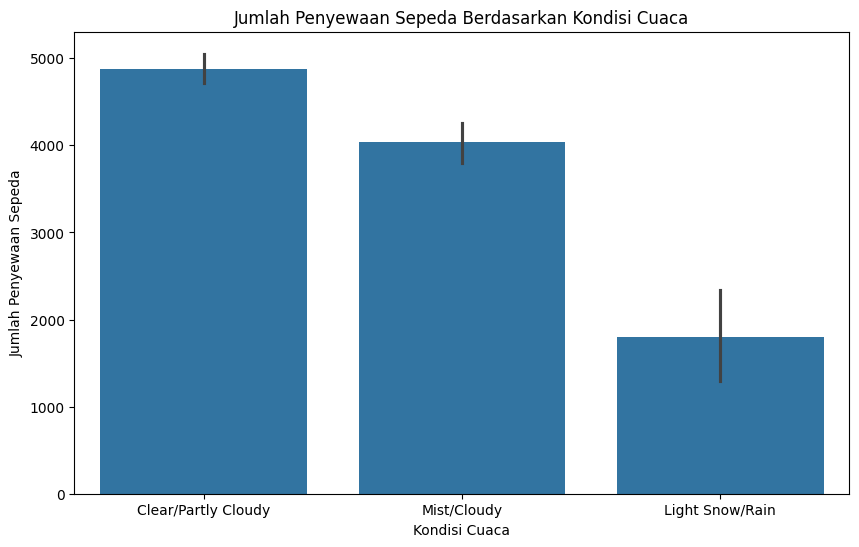

In [31]:
# Membuat bar chart jumlah penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))

sns.barplot(x='weather_situation',
            y='count',
            data=day_df)

plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

Berdasarkan visualisasi menggunakan *bar plot* diperoleh bahwa kondisi cuaca memengaruhi jumlah penyewaan sepeda. Kondisi cuaca saat cerah atau sebagian berawan menjadi kondisi yang paling diminati untuk menyewa sepeda, kemudian diikuti dengan kondisi cuaca berkabut atau mendung, dan terakhir ketika cuaca sedikit bersalju atau hujan. Kondisi cuaca ekstrem seperti hujan lebat disertai petir atau bersalju tidak diminati bahkan tidak dipilih untuk menyewa sepeda.

### Pertanyaan 4:
Apakah ada perbedaan jumlah penyewaan sepeda berdasarkan hari kerja dan hari libur?

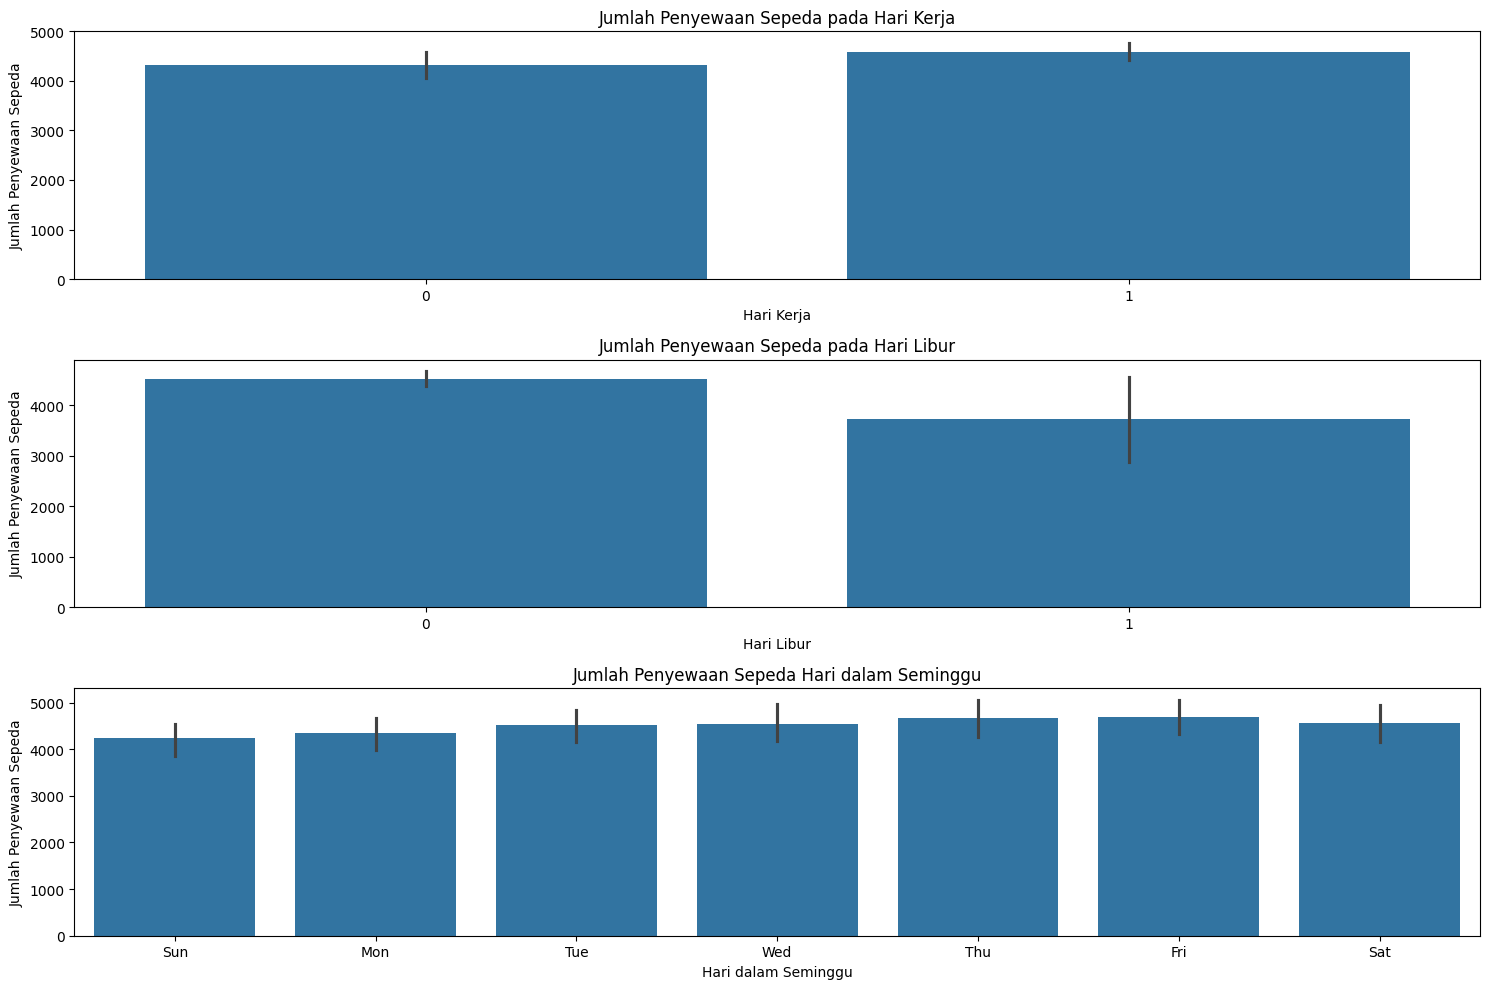

In [32]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))

# Penyewaan sepeda berdasarkan hari kerja
sns.barplot(x='workingday',
            y='count',
            data=day_df,
            ax=axes[0])

axes[0].set_title('Jumlah Penyewaan Sepeda pada Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Penyewaan Sepeda')

# Penyewaan sepeda berdasarkan hari libur
sns.barplot(x='holiday',
            y='count',
            data=day_df,
            ax=axes[1])

axes[1].set_title('Jumlah Penyewaan Sepeda pada Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Penyewaan Sepeda')

# Penyewaan sepeda berdasarkan hari dalam seminggu
sns.barplot(x='weekday',
            y='count',
            data=day_df,
            ax=axes[2])

axes[2].set_title('Jumlah Penyewaan Sepeda Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Penyewaan Sepeda')

plt.tight_layout()
plt.show()


Berdasarkan visualisasi menggunakan *bar plot* diperoleh bahwa jumlah penyewaan sepeda pada hari kerja (senin - jumat) lebih banyak dibandingkan dengan jumlah penyewaan sepeda pada akhir pekan (sabtu dan minggu). Selanjutnya, jumlah penyewaan sepeda pada hari biasa lebih banyak dibandingkkan dengan jumlah penyewaan sepeda pada hari libur. Jumlah penyewaan sepeda pada hari Jumat menempati posisi pertama sebagai hari dengan penyewaan sepeda terbanyak dan hari Minggu memiliki jumlah penyewaan sepeda paling sedikit.

### Pertanyaan 5:
Berapa perbandingan antara pengguna terdaftar dan kasual?

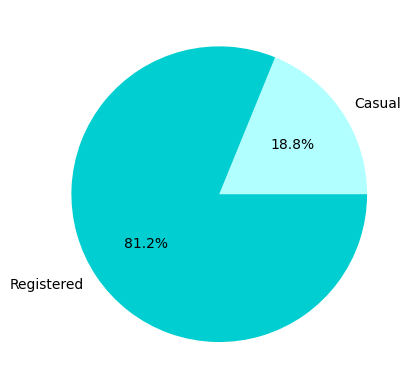

In [33]:
# Menjumlahkan semua elemen dalam kolom casual
total_casual = sum(day_df['casual'])

# Menjumlahkan semua elemen dalam kolom registered
total_registered = sum(day_df['registered'])

# Membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['#B2FFFF', '#00CED1'])

# Menampilkan pie plot
plt.show()

Pelanggan yang sudah terdaftar adalah sebanyak 81,2%, sedangkan pelanggan yang belum terdaftar (casual) adalah sebanyak 18,8%.

## Analisis Lanjutan (Opsional)

### Analisis Clustering
Total penyewaan sepeda berdasarkan tingkat kelembaban

In [34]:
# Membuat kolom baru bernama 'humidity_category' yang menunjukkan tingkat kelembaban
def classify_humidity(humidity):
    if humidity < 0.45:
        return 'Terlalu Kering'
    elif humidity >= 0.45 and humidity < 0.65:
        return 'Ideal'
    else:
        return 'Terlalu Lembab'

hour_df['humidity_category'] = hour_df['humidity'].apply(classify_humidity)
day_df['humidity_category'] = day_df['humidity'].apply(classify_humidity)

In [35]:
day_df.groupby(by = 'humidity_category').agg({
    'count': ['sum']
})

,count
,sum
humidity_category,
Ideal,1618295
Terlalu Kering,281937
Terlalu Lembab,1392447


Dengan melakukan analisis lanjutan menggunakan teknik clustering, kita dapat mengidentifikasi kelompok pelanggan yang cenderung menyewa sepeda pada tingkat kelembaban ideal.

### RFM Analysis
RFM Analysis dibawah ini digunakan untuk memahami perilaku pelanggan dari tiga faktor utama, yaitu:
- Recency (seberapa baru pelanggan berinteraksi dengan bisnis penyewaan sepeda)
- Frequency (banyaknya pelanggan penyewa sepeda dalam berinteraksi)
- Monetary (banyaknya uang yang dikeluarkan oleh pelanggan untuk menyewa sepeda)

In [36]:
current_date = max(hour_df['dateday'])
rfm_df = hour_df.groupby('registered'). agg({
    'dateday': lambda x: (current_date - x.max()).days, # Recency
    'instant': 'count', # Frequency
    'count': 'sum' # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print(rfm_df.head())

   registered  Recency  Frequency  Monetary
0           0       38         24        35
1           1        0        201       294
2           2        1        245       648
3           3        0        294      1154
4           4        3        307      1602


## Conclusion

- Conclusion pertanyaan 1: Dapat diamati bahwa pada tahun 2011 dan 2012 terjadi perbedaan bulan untuk total penyewaan sepeda tertinggi. Total penyewaan sepeda tertinggi untuk tahun 2011 terjadi pada bulan Juni, sedangkan pada tahun 2012 total penyewaan sepeda tertinggi terjadi pada bulan September. Namun, kedua tahun tersebut memiliki total penyewaan sepeda yang sama, yaitu pada bulan Januari. Dari kedua tahun tersebut dapat disimpulkan bahwa total penyewaan sepeda pada tahun 2012 seluruhnya lebih tinggi dibandingkan total penyewaan sepeda pada tahun 2011. Artinya, terjadi peningkatan total penyewaan sepeda dari tahun 2011 ke tahun 2012.

- Conclusion pertanyaan 2: Dapat diamati bahwa musim dapat memengaruhi jumlah penyewaan sepeda, baik pelanggan terdaftar maupun pelanggan kasual. Hal ini dapat dipengaruhi oleh beberapa faktor, seperti kondisi cuaca, temperatur, kelembaban, hari libur, dan lain-lain.

- Conclusion pertanyaan 3: Faktor cuaca dapat memengaruhi seseorang untuk menyewa sepeda. Hal ini dapat diamati dari visualisasi tersebut bahwa kondisi cuaca cerah atau sebagian berawan menjadi kondisi yang paling diminati untuk menyewa sepeda. Disisi lain, cuaca ekstrem seperti bersalju dan hujan lebat tidak diminati untuk menyewa sepeda. Hal tersebut masuk akal karena kondisi cuaca ekstrem tidak memungkinkan dan membahayakan seseorang untuk bersepeda.

- Conclusion pertanyaan 4: Terdapat perbedaan jumlah penyewaan sepeda pada hari kerja dan hari libur, walaupun perbedaan tersebut tidak terlalu signifikan, pelanggan lebih menyukai menyewa sepeda pada hari biasa dibandingkan hari libur.

- Conclusion pertanyaan 5: Terdapat perbedaan yang signifikan antara jumlah pelanggan yang sudah terdaftar dan jumlah pelanggan yang belum terdaftar (kasual). Mayoritas pelanggan sudah terdaftar dengan persentase 81,2%, menunjukkan bahwa sebagian besar pelanggan telah memiliki akun atau berlangganan. Sedangkan, pelanggan yang belum terdaftar sebesar 18,8%. Hal ini menunjukkan bahwa layanan penyewaan sepeda lebih banyak digunakan oleh pelanggan tetap dibandingkan pelanggan sementara. Bisa jadi ada potensi untuk meningkatkan konversi pelanggan kasual menjadi pelanggan terdaftar di masa yang akan datang.